# Notebook 8: Uncover Correlations with COVID-19 Positivity Rate

In the previous notebook, we discussed that one can investigate COVID outcomes across Chicago neighborhoods by using a `positivity_rate` (*percentage of completed COVID tests that are positive*) outcome variable. 

Remember in the cholera case study how we explored possible relationships between our outcome variable, `death_rate`, and various explanatory variables like `population_density` and `elevation`? Now we similarly want to search for explanatory variables to discover why people contract COVID!

In this notebook, we will: 
- Explore which explanatory variables correlate with COVID positivity
- Construct scatter plots to visualize our results

------------------------------------------
 
<br>
 
<img src="../imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size=4> **Journal 8a:** Explanatory Variables</font>

Based on your real-world knowledge of COVID-19, what explanatory variables would you *like to have* in order to explain what causes one community to contract more COVID-19 than another? Think back to the brainstorm of ways that we measure communities. Which of these do you think may make the people of a communitity more or less likely to be at a higher risk of COVID-19 infection? 

> Write your answer here! 

<br>


### Unleash the firehose of variables! 

Data science is often a fascinating game of coping with "what you have" versus "what you want". 

<table><tr>
    <td> <img src="../imgs/firehose.jpeg" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

Let's load in the dataset from the last notebook. This includes the new variables that you generated from the existing data (`CASER4_16`, `TESTR4_16`, and our outcome variable `POSRATE4_16`)

<br>


In [1]:
import pandas as pd

# Next we load our data into a usable format
frame = pd.read_csv("../data/cov_chi_with_positivity.csv")

# Why do we drop nan (missing) values? Because in this case, it makes data-visualization difficult!
frame = frame.dropna()
print(f"How many locations are in our frame?: {len(frame)}")

How many locations are in our frame?: 53


This means we have 53 regions of Chicago in the data. 

In [3]:
# What are the columns of our dataset?

cols = frame.columns.tolist()
print(cols)

['ZIP', 'POP', 'P0_44', 'P45_64', 'P65_', 'PER65', 'MEDINC', 'PERNOINS', 'PERW', 'PERHIS', 'PERBLK', 'PERASN', 'PERAUTO', 'PERTRAN', 'PERPEDB', 'PERTELE', 'PEROFFTC', 'PERHSRV', 'PERPSRV', 'PERFOOD', 'PERCLEAN', 'FDTRTPER', 'WS_5', 'POPDENS', 'PERCROWD', 'CASE4_16', 'TEST4_16', 'CASER4_16', 'TESTR4_16', 'POSRATE4_16']


_____________________________________________________________________

## The Data Dictionary
_____________________________________________________________________

**Population**

`POP`: Total population 

`P0_44`: Number of people ages 0 to 44 

`P45_64`: Number of people ages 45 to 64: 

`P65_`: Number of people ages 65 and older 

<p>&nbsp;</p>

**Socio-economic status** 

`MEDINC`: Median household income 

`PERNOINS`: Percent without health insurance 

<p>&nbsp;</p>

**Racial/Ethnic neighbourhood types**

`PERBLK`: Percent of population that is Black  

`PERHISP`: Percent of population that is Hispanic  

`PERW`: Percent of population that is White 

`PERASN`: Percent of population that is Asian 

<p>&nbsp;</p>

**Occupations**

`PEROFFTC`: Percent office and telecommute workers

`PERHSRV`: Percent healthcare service workers

`PERPSRV`: Percent public service workers

`PERFOOD`: Percent food service workers

`PERCLEAN`: Percent cleaning service workers

<p>&nbsp;</p>

**How people get to work**

`PERAUTO`: Percent personal automobile commuters

`PERTRAN`: Percent public transportation commuters

`PERPEDB`: Percent pedestrian and bike commuters

`PERTELE`: Percent telecommuters (work from home)


<p>&nbsp;</p>

**Built environments**

`FDTRTPER`: Percent food desert tracts 

`WS_5`: Hospital accessibility score (lower score = hospitals are farther away)

`POPDENS`: Population density (per square meter)  

`PERCROWD`: Percent housing units w/ > 1 person per room 



<p>&nbsp;</p>

**COVID-19**

`CASE4_16`: Cases, total (4/16): 

`TEST4_16`: Tests, total (4/16)

`CASER4_16`: Case Rate (4/16) (per pop.) 

`TESTR4_16`: Testing Rate (4/16) (per pop.) 

`POSRATE4_16`: Positivity rate (4/16) (percent)


In [5]:
# Use this cell to explore the different variables by changing the name inside. 
# Remove '.head()' to see all of the data!

frame['MEDINC'].head()

0    103243
1    111164
2    131477
3     93508
4     44043
Name: MEDINC, dtype: int64

### Explore the Variables!

Remember that scatterplots are a great way to quickly look for potential correlations (relationships) between explanatory variables and the outcome variable (positivity rate).

Since you have lots of potential explanatory variables from the dataset, the code below has made it easy to change the `exp_var_to_explore` variable and generate a scatterplot with the best fit line and R-squared value. 

The cell has been set up to explore median income (`MEDINC`). Run the cell as is and enter the results in the table below. Then explore at least 3 more explanatory variables.

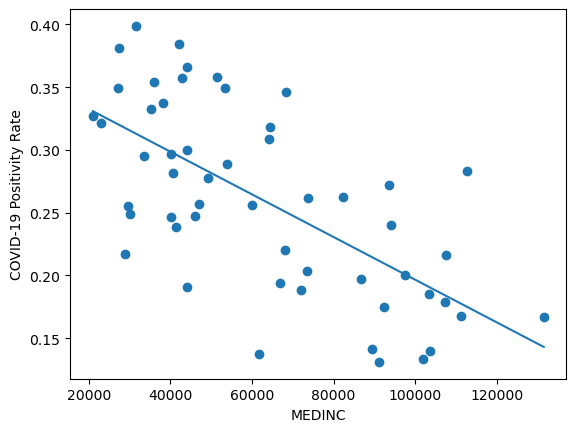

R-squared: 0.43286406687053286


In [24]:
import numpy as np
from matplotlib import pyplot as plt

# Visualizing to assist 
# Generate scatterplots of variables vs. mortality

exp_var_to_explore = 'MEDINC'

x = frame[exp_var_to_explore]
y = frame['POSRATE4_16']

# Put the dots on the plot
plt.scatter(x, y)

# Here we add a 'line of best fit' that helps us visualize potential correlation!
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))


plt.xlabel(exp_var_to_explore)
plt.ylabel('COVID-19 Positivity Rate')

# plt.xlim(right = 100)

# Reveal the plot. 
plt.show()

# Now find correlation and p-value. 
from scipy.stats import pearsonr 
r_val, p_val = pearsonr(x,y)
r_squared = r_val**2
print(f"R-squared: {r_squared}")

### Task: Go to the previous cells and explore a total of 4 explanatory variables. Record what you learn from each in the following table:
- note, you will need to edit the Markdown by double clicking in this cell! 


| Explanatory Variable | Correlation Type (+ or -) |  R-squared | Notes |
|---|---|---|---|
|Median Household Income   | -  | 0.43  | As income increaases, positivity rate decreases  |
| X  | X |  X | X  |
| X | X  | X  | X  |
| X | X  | X  | X  |

<img src="../imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size="4">**Journal 8b:** Reflection </font>

**Why did you choose these particular variables? What hypotheses are swirling around in your mind right now?**
> Write your answer here! 
<br>

<img src="../imgs/pencil.png" alt="Drawing" align=left style="width: 20px;"/> <font size="4">**Journal 8c:** Reflection </font>

At the end of each notebook in Data4All, we will take time to reflect on what we learned! You can write as much or as little as you like, but please answer the following three questions... 

**What do you understand better after this notebook than before?**
> Write your answer here! 

**Please fill out the Notebook survey here!**
> https://forms.gle/54KHEbPGsRxQU3Bh9

<br>

--------------------------------

<br>

<img src="../imgs/save-icon.jpeg" alt="Drawing" align=left style="width: 20px;"/> <font size="4">     **&ensp;&ensp;&ensp;Last step: save your work!** </font>